# Model Training [ Result 3 ] -- Part 2 
# Target variable --> Average score
## with Top 10 features 
### 1.1 Import Data and Required Packages  
Importing Pandas, Numpy, Matplotlib, Seaborn

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error ,r2_score


### Preparing X and Y variables

In [42]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

Y_train = pd.read_csv('Y_train.csv').squeeze()
Y_test = pd.read_csv('Y_test.csv').squeeze()

X=X_train
Y=Y_train

In [43]:
X.columns

Index(['math_score', 'test_preparation_course_completed',
       'test_preparation_course_none', 'lunch_free/reduced', 'gender_female',
       'lunch_standard', 'parental_level_of_education_high school',
       'race_ethnicity_group D', 'race_ethnicity_group B', 'gender_male'],
      dtype='object')

In [44]:
X_train

,math_score,test_preparation_course_completed,test_preparation_course_none,lunch_free/reduced,gender_female,lunch_standard,parental_level_of_education_high school,race_ethnicity_group D,race_ethnicity_group B,gender_male
0,62,0,1,0,1,1,0,1,0,0
1,66,1,0,1,1,0,0,0,0,0
2,79,0,1,1,1,0,0,1,0,0
3,61,0,1,1,0,0,0,0,0,1
4,73,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
795,87,0,1,0,1,1,0,1,0,0
796,69,0,1,0,0,1,0,0,0,1
797,53,0,1,0,1,1,0,0,0,0
798,50,1,0,1,0,0,0,0,0,1


In [45]:
Y_test

0      87.0
1      64.0
2      75.0
3      75.0
4      82.0
       ... 
195    55.0
196    57.0
197    77.0
198    72.0
199    69.0
Name: average, Length: 200, dtype: float64

In [46]:
type(Y)

pandas.core.series.Series

### Ridge Regression  

"Ridge regression is the regularized form of linear regression."

https://dataaspirant.com/ridge-regression/

In [47]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [48]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-12.935484114542504


In [49]:
prediction_ridge=ridge_regressor.predict(X_test)

pred_df=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df['Predictons']=prediction_ridge  
pred_df

,average,Predictons
0,87.0,92.703030
1,64.0,62.296745
2,75.0,75.480601
3,75.0,70.392154
4,82.0,80.707922
...,...,...
195,55.0,61.595805
196,57.0,60.906387
197,77.0,78.665319
198,72.0,69.301215


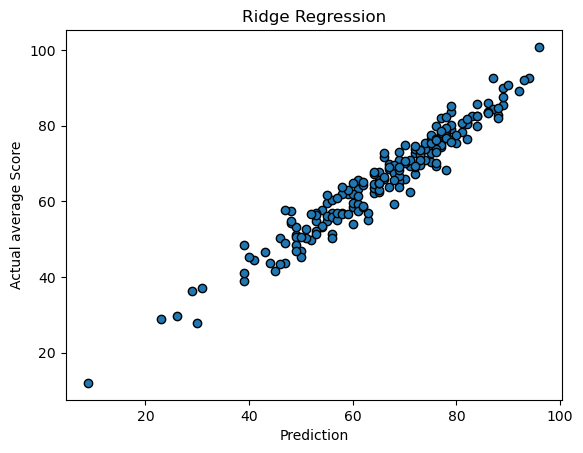

In [50]:
plt.scatter(Y_test,prediction_ridge,edgecolors='black')
plt.ylabel('Actual average Score')
plt.xlabel("Prediction")
plt.title("Ridge Regression")
plt.show()

In [51]:
print(" Accuracy of the Ridge Regression model is ",r2_score(Y_test,prediction_ridge)*100 )

print("\n Mean Squared Error:", mean_squared_error(Y_test,prediction_ridge))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,prediction_ridge)))

 Accuracy of the Ridge Regression model is  94.28022993199721

 Mean Squared Error: 12.284222910165562

 Root Mean Squared Error: 3.504885577328533


### Lasso Regression  
Lasso regression (short for “Least Absolute Shrinkage and Selection Operator”) is a type of linear regression that is used for feature selection and regularization.

https://sparkbyexamples.com/machine-learning/lasso-regression/

In [52]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,Y_train)


C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.802e+03, tolerance: 1.292e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.967e+03, tolerance: 1.276e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [53]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


{'alpha': 0.01}
-12.932294828967951


In [54]:
prediction_lasso=lasso_regressor.predict(X_test)

pred_df1=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df1['Predictons']=prediction_lasso  
pred_df1

,average,Predictons
0,87.0,92.728016
1,64.0,62.208603
2,75.0,75.466853
3,75.0,70.397864
4,82.0,80.717446
...,...,...
195,55.0,61.546158
196,57.0,60.922151
197,77.0,78.607022
198,72.0,69.333576


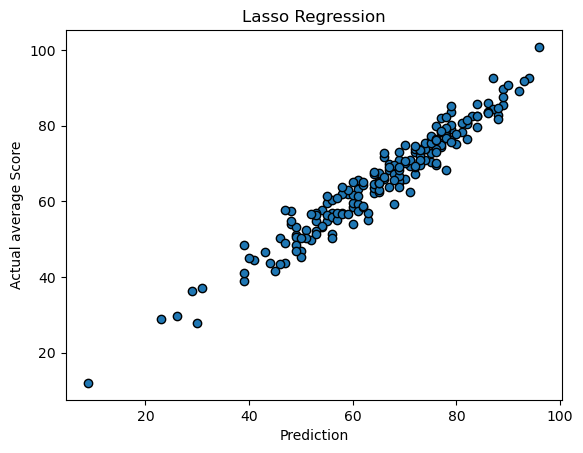

In [55]:
plt.scatter(Y_test,prediction_lasso,edgecolors='black')
plt.ylabel('Actual average Score')
plt.xlabel("Prediction")
plt.title("Lasso Regression")
plt.show()

In [56]:
print(" Accuracy of the Lasso Regression model is ",r2_score(Y_test,prediction_lasso)*100 )

print("\n Mean Squared Error:", mean_squared_error(Y_test,prediction_lasso))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,prediction_lasso)))

 Accuracy of the Lasso Regression model is  94.27929948176109

 Mean Squared Error: 12.286221217435205

 Root Mean Squared Error: 3.505170640273481


C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


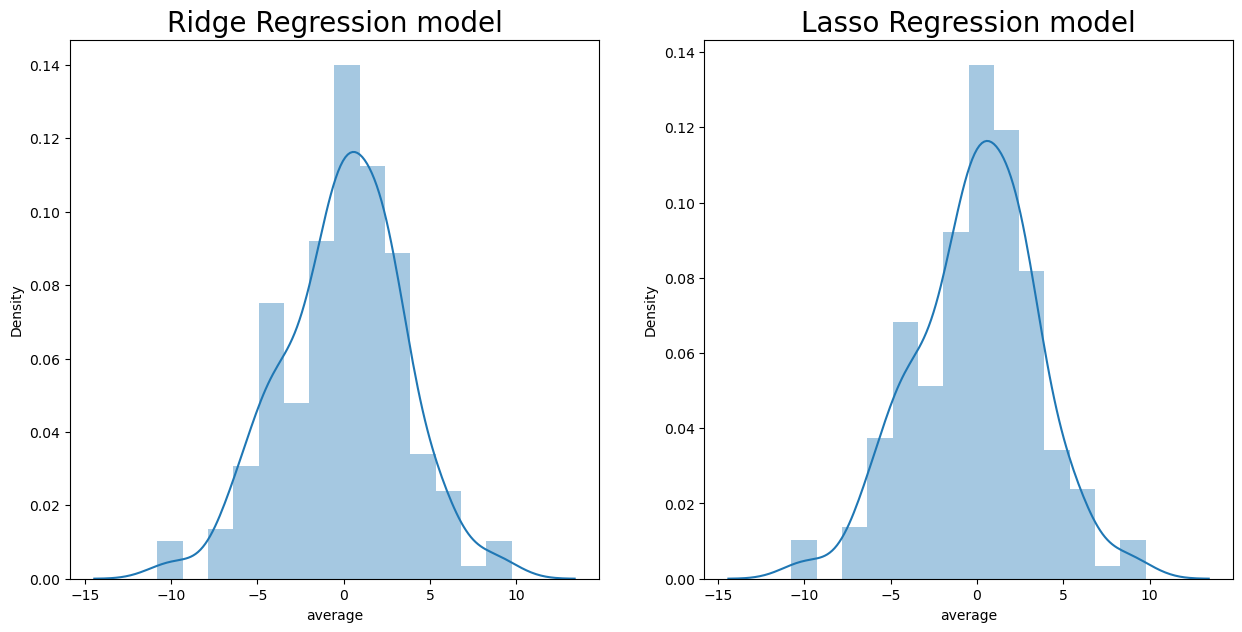

In [57]:
# Graph Comparison Between Ridge VS Lasso

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.distplot(Y_test-prediction_ridge)
plt.title('Ridge Regression model', fontsize = 20)


plt.subplot(122)
sns.distplot(Y_test-prediction_lasso)
plt.title('Lasso Regression model', fontsize = 20)

plt.show()

### Random Forest Regression

Random forest regression is a supervised learning algorithm that uses an ensemble learning method for regression.  

Random forest is a bagging technique and not a boosting technique. The trees in random forests run in parallel, meaning there is no interaction between these trees while building the trees.  

Random forest operates by constructing a multitude of decision trees at training time and outputting the clas s that’s the mode of the classes (classification) or mean prediction (regression) of the individual trees.

https://builtin.com/data-science/random-forest-python

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [60]:
prediction_rf= rf_regressor.predict(X_test)

pred_df2=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df2['Predictons']=prediction_rf  
pred_df2

,average,Predictons
0,87.0,93.219000
1,64.0,62.516500
2,75.0,73.063746
3,75.0,74.252000
4,82.0,81.234000
...,...,...
195,55.0,57.625000
196,57.0,62.624000
197,77.0,76.720000
198,72.0,71.827558


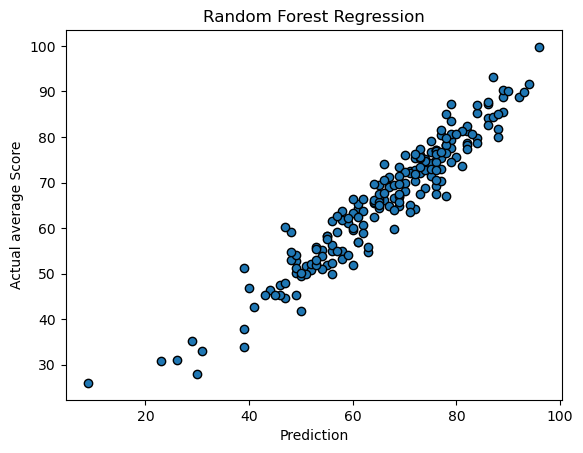

In [61]:
plt.scatter(Y_test,prediction_rf,edgecolors='black')
plt.ylabel('Actual average Score')
plt.xlabel("Prediction")
plt.title("Random Forest Regression")
plt.show()

In [62]:
from sklearn.metrics import r2_score
print(" Accuracy of the Random Forest Regression model is", r2_score(Y_test,prediction_rf)*100)

print("\n Mean Squared Error:", mean_squared_error(Y_test,prediction_rf))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,prediction_rf)))

 Accuracy of the Random Forest Regression model is 91.8693729492817

 Mean Squared Error: 17.46196681037582

 Root Mean Squared Error: 4.178751824453783


C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


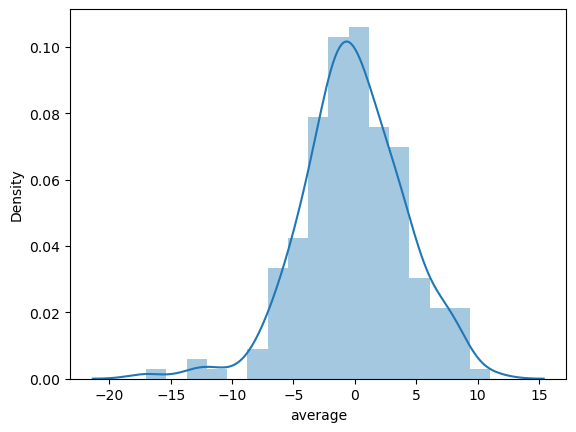

In [63]:
sns.distplot(Y_test-prediction_rf)
plt.show()

### K-Neighbors Regression

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions).

A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors. Another approach uses an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.

https://medium.com/analytics-vidhya/k-neighbors-regression-analysis-in-python-61532d56d8e4

In [64]:
from sklearn.neighbors import KNeighborsRegressor

Maximum accuracy:- 0.9123239042728827 at K = 3


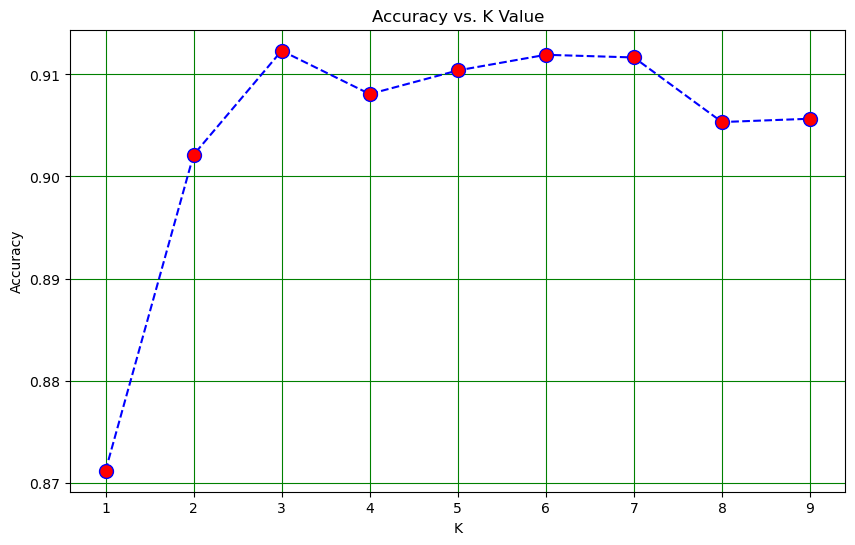

In [71]:
acc = []
# Will take some time for first finding the optimal value of K
from sklearn import metrics
for i in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train,Y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.r2_score(Y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True,color='g')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+1)


In [72]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [73]:
prediction_knn= knn_regressor.predict(X_test)

pred_df3=pd.DataFrame(Y_test) ### Creating DataFrame of Y_test(Price)and predictions(price)
pred_df3['Predictons']=prediction_knn  
pred_df3

,average,Predictons
0,87.0,88.666667
1,64.0,63.000000
2,75.0,73.000000
3,75.0,69.333333
4,82.0,77.666667
...,...,...
195,55.0,59.000000
196,57.0,63.666667
197,77.0,79.333333
198,72.0,70.666667


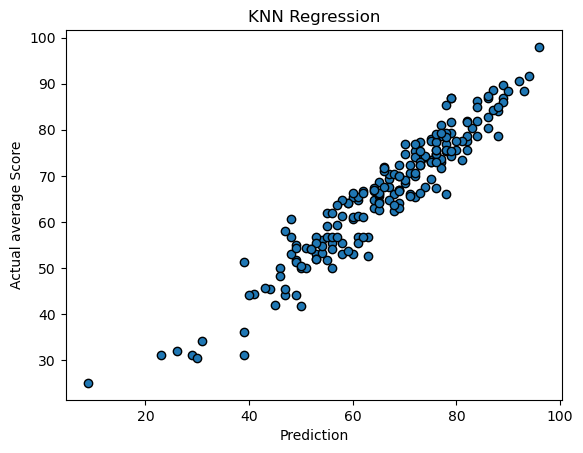

In [74]:
plt.scatter(Y_test,prediction_knn,edgecolors='black')
plt.ylabel('Actual average Score')
plt.xlabel("Prediction")
plt.title("KNN Regression")
plt.show()

In [75]:
from sklearn.metrics import r2_score
print(" Accuracy of the KNN Regression model is", r2_score(Y_test,prediction_knn)*100)

print("\n Mean Squared Error:", mean_squared_error(Y_test,prediction_knn))

print("\n Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test,prediction_knn)))

 Accuracy of the KNN Regression model is 91.23239042728827

 Mean Squared Error: 18.83

 Root Mean Squared Error: 4.339354790749426


C:\Users\Ashish Kumar AK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


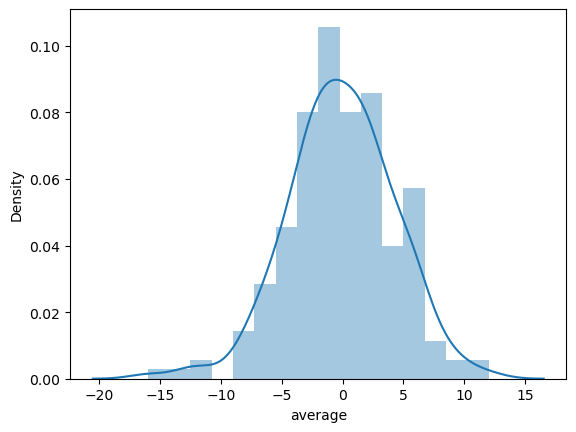

In [76]:
sns.distplot(Y_test-prediction_knn)
plt.show()